##Assignment – Build a classifier for detecting Mines and Determine Influence of k in K‑Nearest Neighbours on the UCI Sonar Dataset

 There are two classes - mine "M" (positive class, label 1) and rock "R" (negative class, label 0)

**Learning goals**

-- Detect and reason about class imbalance.

-- Evaluate two -values (3 and 5) for K‑NN using proper cross‑validation.

-- Compare accuracy to class‑sensitive metrics (precision, recall, F1).

-- Practise writing result tables and interpreting trade‑offs.

-- (Extension) Experiment with a third classifier of your choice.

**Load dataset**
use the following command to convert the string labels into categorical
```
y = df['Label'].astype('category').cat.codes
```
**Part 1  Exploratory Check**

- Missing values  Report the count of NaN values in the raw CSV.

- Class balance: (a) Display a bar plot of R vs M counts.

(b) Compute the imbalance ratio (larger‑class ∕ smaller‑class).

(c) Decide whether the dataset is balanced or imbalanced (justify). This is upto your discretion.



**Part 2  Modelling**

- Perform 80 / 20 train‑test split (stratified if imbalanced).

- use StandardScaler → KNeighborsClassifier inside each fold.

- 5‑fold CV (use StratifiedKFold when imbalanced, plain KFold otherwise).

- Evaluate two models: Model  (a) KNN n_neighbors = 3 (b) KNN n_neighbors = 5

- For each model record:

i) Mean training accuracy (across folds)

ii) Mean validation accuracy

iii) Gap = train − val

- Test accuracy on the held‑out 20 % split

- Confusion matrix on the test set

- Precision, recall, F1  

Fill the required metrics into the table template below (extend it with the new columns for precision/recall/F1):

| k | Train Acc | Val Acc | Gap | Test Acc | Precision | Recall | F1 | Confusion Matrix | Best |
| :-: | :-------: | :-----: | :--: | :------: | :-------: | :----: | :---: | :--------------- | :--: |

Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

Make your judgement using the following reasong - If Based on your validation accuracy for k = 3 looked best, but the hold-out test shows k = 5 has higher balanced accuracy. Which would you deploy given that missing a mine carries greater risk than a false alarm?”

**Part 3  Interpretation Questions**

Q2: Class imbalance – How severe is it, and which metric (precision vs recall) carries more significance in a sonar mine‑hunting scenario?

Q3: k = 3 vs k=5 – Compare validation vs test results. Which k generalises better?

Q4:   Error profile – Using the confusion matrices, state whether false positives or false negatives dominate and discuss practical impact.

**Part 4  Extension (Open‑Ended)**

- Pick one additional classifier such as SVC:

- Evaluate it with the same pipeline and metrics (include precision/recall/F1).

- Add a new row to the results table.

- State whether it improves over KNN and why that might be.


Note: Precision, recall, F1 scores can be returned for both the classes. For the assignment we stick to the single-scalar version focused on mines. For precision, recall calculate with respect to the positive class denoted by class label 1. Note the variables denoting the test splits can change based on what you have used.

```
prec = precision_score(y_te, y_pred, pos_label=1)
rec  = recall_score(y_te, y_pred, pos_label=1)
f1   = f1_score(y_te, y_pred, pos_label=1)
```

Total missing (NaN) values: 0


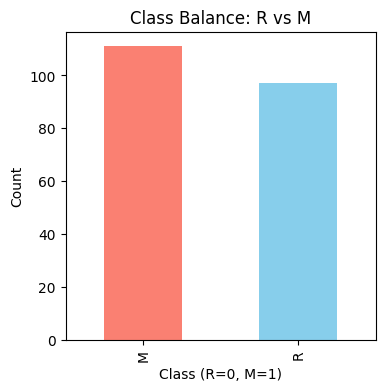

Imbalance ratio = 1.1443298969072164
X_train shape: (166, 60)
X_test shape: (42, 60)
Results for k=3:
Train Acc: 0.9518
Val Acc: 0.8494
Gap: 0.1024
Test Acc: 0.7143
Precision: 0.7222
Recall: 0.6500
F1 Score: 0.6842
Confusion Matrix:
 [[17  5]
 [ 7 13]]

Results for k=5:
Train Acc: 0.8961
Val Acc: 0.8073
Gap: 0.0888
Test Acc: 0.7381
Precision: 0.8000
Recall: 0.6000
F1 Score: 0.6857
Confusion Matrix:
 [[19  3]
 [ 8 12]]



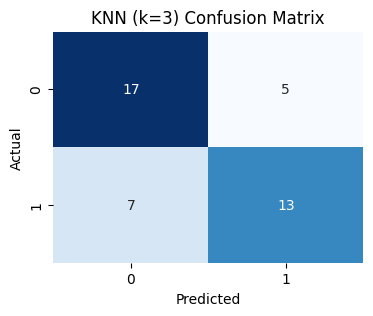

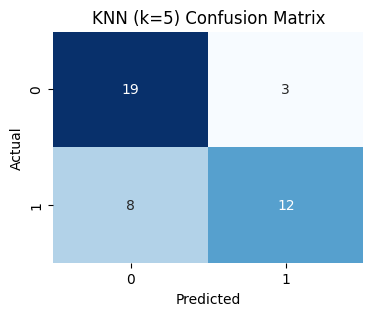

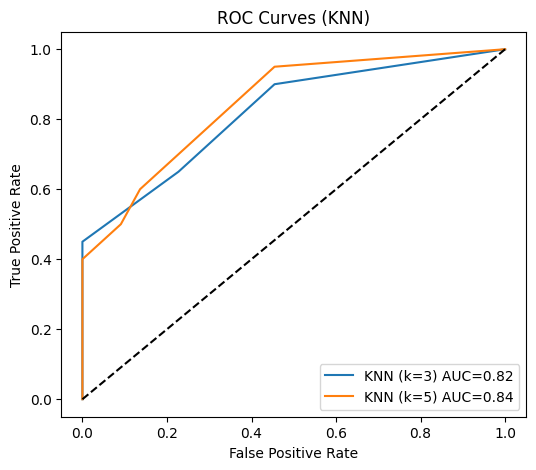

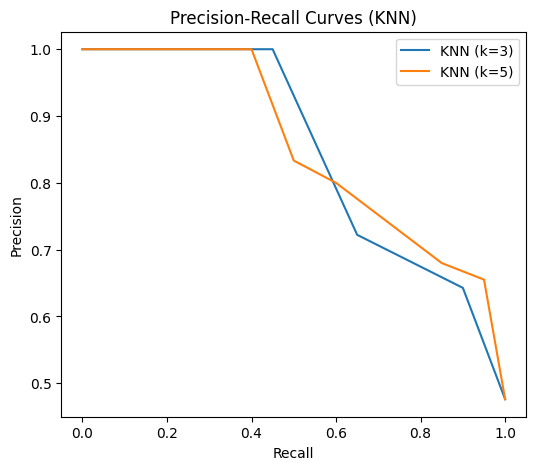

=== SVC (RBF) Results ===
Mean Train Acc (5-fold CV): 0.9910
Mean Val Acc   (5-fold CV): 0.8314
Gap (Train − Val)         : 0.1596
Test  Accuracy            : 0.8571
Test  Precision (M=1)     : 0.9375
Test  Recall (M=1)        : 0.7500
Test  F1 Score (M=1)      : 0.8333
Test  Confusion Matrix    :
[[21  1]
 [ 5 15]]


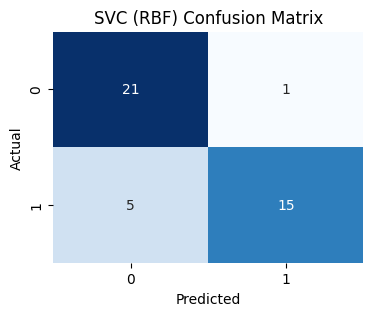

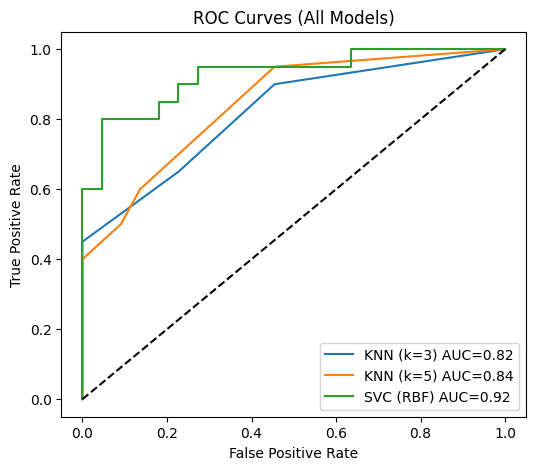

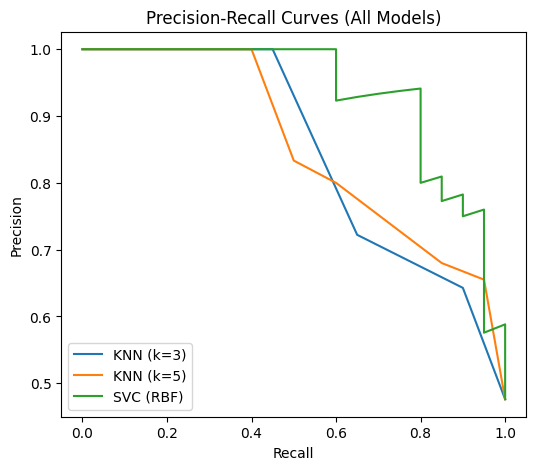

In [ ]:
# %% 
# Part 1 – Exploratory Check

import pandas as pd
import matplotlib.pyplot as plt

# Load the UCI Sonar dataset (skip the first row with feature names)
df = pd.read_csv('sonar.all-data.csv', header=None, skiprows=1)
df.columns = [f'Feature_{i}' for i in range(60)] + ['Label']

# 1. Missing values
total_nans = df.isna().sum().sum()
print("Total missing (NaN) values:", total_nans)

# 2. Class balance bar plot
label_counts = df['Label'].value_counts()  # {'M': 111, 'R': 97}
plt.figure(figsize=(4, 4))
label_counts.plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Class Balance: R vs M")
plt.xlabel("Class (R=0, M=1)")
plt.ylabel("Count")
plt.show()

# 3. Imbalance ratio
count_R = label_counts["R"]
count_M = label_counts["M"]
larger = max(count_R, count_M)  # 111
smaller = min(count_R, count_M)  # 97
imbalance_ratio = larger / smaller  # ≈ 1.144
print("Imbalance ratio =", imbalance_ratio)


# %% 
# Part 2 – Modelling

import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# Prepare data for modelling
X = df.iloc[:, :-1].values.astype(float)
y = df['Label'].astype('category').cat.codes  # “R”→0, “M”→1

# 80/20 stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Function to compute KNN metrics
def compute_knn_metrics(k, X_tr, y_tr, X_te, y_te):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_accs = []
    val_accs = []
    y_tr_np = np.array(y_tr)

    # 5-fold CV on training split
    for train_idx, val_idx in skf.split(X_tr, y_tr_np):
        X_tr_fold, X_val_fold = X_tr[train_idx], X_tr[val_idx]
        y_tr_fold, y_val_fold = y_tr_np[train_idx], y_tr_np[val_idx]

        # StandardScaler inside fold
        scaler_fold = StandardScaler()
        X_tr_scaled = scaler_fold.fit_transform(X_tr_fold)
        X_val_scaled = scaler_fold.transform(X_val_fold)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr_scaled, y_tr_fold)

        # training accuracy
        y_tr_pred = knn.predict(X_tr_scaled)
        train_accs.append(accuracy_score(y_tr_fold, y_tr_pred))

        # validation accuracy
        y_val_pred = knn.predict(X_val_scaled)
        val_accs.append(accuracy_score(y_val_fold, y_val_pred))

    mean_train_acc = np.mean(train_accs)
    mean_val_acc = np.mean(val_accs)
    gap = mean_train_acc - mean_val_acc

    # Evaluate on hold-out test set
    scaler_full = StandardScaler()
    X_tr_all_scaled = scaler_full.fit_transform(X_tr)
    X_te_scaled = scaler_full.transform(X_te)

    knn_final = KNeighborsClassifier(n_neighbors=k)
    knn_final.fit(X_tr_all_scaled, y_tr_np)
    y_test_pred = knn_final.predict(X_te_scaled)
    y_te_np = np.array(y_te)

    test_acc = accuracy_score(y_te_np, y_test_pred)
    prec = precision_score(y_te_np, y_test_pred, pos_label=1)
    rec = recall_score(y_te_np, y_test_pred, pos_label=1)
    f1 = f1_score(y_te_np, y_test_pred, pos_label=1)
    cm = confusion_matrix(y_te_np, y_test_pred)

    return {
        'k': k,
        'Train Acc': mean_train_acc,
        'Val Acc': mean_val_acc,
        'Gap': gap,
        'Test Acc': test_acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'Conf Matrix': cm
    }

# Compute metrics for k=3 and k=5
metrics_k3 = compute_knn_metrics(3, X_train, y_train, X_test, y_test)
metrics_k5 = compute_knn_metrics(5, X_train, y_train, X_test, y_test)

# Display KNN results
def display_metrics(metrics):
    print(f"Results for k={metrics['k']}:")
    print(f"Train Acc: {metrics['Train Acc']:.4f}")
    print(f"Val Acc: {metrics['Val Acc']:.4f}")
    print(f"Gap: {metrics['Gap']:.4f}")
    print(f"Test Acc: {metrics['Test Acc']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1']:.4f}")
    print("Confusion Matrix:\n", metrics['Conf Matrix'])
    print()

display_metrics(metrics_k3)
display_metrics(metrics_k5)


# %% 
# Part 3 – Confusion Matrix and Curves

import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

# Plot confusion matrices for KNN k=3 and k=5
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_conf_matrix(metrics_k3['Conf Matrix'], "KNN (k=3) Confusion Matrix")
plot_conf_matrix(metrics_k5['Conf Matrix'], "KNN (k=5) Confusion Matrix")

# Compute ROC and Precision-Recall curves for all models
scaler_roc = StandardScaler()

# KNN k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
X_train_scaled = scaler_roc.fit_transform(X_train)
knn3.fit(X_train_scaled, y_train)
X_test_scaled = scaler_roc.transform(X_test)
y_score_knn3 = knn3.predict_proba(X_test_scaled)[:, 1]
fpr_knn3, tpr_knn3, _ = roc_curve(y_test, y_score_knn3)
auc_knn3 = auc(fpr_knn3, tpr_knn3)

# KNN k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_scaled, y_train)
y_score_knn5 = knn5.predict_proba(X_test_scaled)[:, 1]
fpr_knn5, tpr_knn5, _ = roc_curve(y_test, y_score_knn5)
auc_knn5 = auc(fpr_knn5, tpr_knn5)

# Plot ROC curves for KNN
plt.figure(figsize=(6, 5))
plt.plot(fpr_knn3, tpr_knn3, label=f'KNN (k=3) AUC={auc_knn3:.2f}')
plt.plot(fpr_knn5, tpr_knn5, label=f'KNN (k=5) AUC={auc_knn5:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (KNN)')
plt.legend()
plt.show()

# Plot Precision-Recall curves for KNN
precision_knn3, recall_knn3, _ = precision_recall_curve(y_test, y_score_knn3)
precision_knn5, recall_knn5, _ = precision_recall_curve(y_test, y_score_knn5)

plt.figure(figsize=(6, 5))
plt.plot(recall_knn3, precision_knn3, label='KNN (k=3)')
plt.plot(recall_knn5, precision_knn5, label='KNN (k=5)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (KNN)')
plt.legend()
plt.show()


# %% 
# Part 4 – Extension: SVC (RBF)

from sklearn.svm import SVC

# 5-fold CV for SVC
def cv_train_val_scores(clf_class, clf_params, X_tr, y_tr, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_accs = []
    val_accs = []
    y_tr_np = np.array(y_tr)
    for train_idx, val_idx in skf.split(X_tr, y_tr_np):
        X_tr_fold, X_val_fold = X_tr[train_idx], X_tr[val_idx]
        y_tr_fold, y_val_fold = y_tr_np[train_idx], y_tr_np[val_idx]

        scaler_fold = StandardScaler()
        X_tr_scaled = scaler_fold.fit_transform(X_tr_fold)
        X_val_scaled = scaler_fold.transform(X_val_fold)

        clf = clf_class(**clf_params)
        clf.fit(X_tr_scaled, y_tr_fold)

        y_tr_pred = clf.predict(X_tr_scaled)
        train_accs.append(accuracy_score(y_tr_fold, y_tr_pred))

        y_val_pred = clf.predict(X_val_scaled)
        val_accs.append(accuracy_score(y_val_fold, y_val_pred))

    return np.array(train_accs), np.array(val_accs)

# Run CV for SVC(RBF)
train_accs_svc, val_accs_svc = cv_train_val_scores(SVC, {}, X_train, y_train)
mean_train_svc = train_accs_svc.mean()
mean_val_svc = val_accs_svc.mean()
gap_svc = mean_train_svc - mean_val_svc

# Evaluate SVC on test set
scaler_full = StandardScaler()
X_train_scaled = scaler_full.fit_transform(X_train)
X_test_scaled = scaler_full.transform(X_test)

svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
y_test_pred_svc = svc.predict(X_test_scaled)

test_acc_svc = accuracy_score(y_test, y_test_pred_svc)
prec_svc = precision_score(y_test, y_test_pred_svc, pos_label=1)
rec_svc = recall_score(y_test, y_test_pred_svc, pos_label=1)
f1_svc = f1_score(y_test, y_test_pred_svc, pos_label=1)
cm_svc = confusion_matrix(y_test, y_test_pred_svc)

# Display SVC results
print("=== SVC (RBF) Results ===")
print(f"Mean Train Acc (5-fold CV): {mean_train_svc:.4f}")
print(f"Mean Val Acc   (5-fold CV): {mean_val_svc:.4f}")
print(f"Gap (Train − Val)         : {gap_svc:.4f}")
print(f"Test  Accuracy            : {test_acc_svc:.4f}")
print(f"Test  Precision (M=1)     : {prec_svc:.4f}")
print(f"Test  Recall (M=1)        : {rec_svc:.4f}")
print(f"Test  F1 Score (M=1)      : {f1_svc:.4f}")
print("Test  Confusion Matrix    :")
print(cm_svc)

# Plot confusion matrix for SVC
plot_conf_matrix(cm_svc, "SVC (RBF) Confusion Matrix")

# ROC and PR curves including SVC
y_score_svc = svc.predict_proba(X_test_scaled)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
auc_svc = auc(fpr_svc, tpr_svc)

# Combine ROC plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_knn3, tpr_knn3, label=f'KNN (k=3) AUC={auc_knn3:.2f}')
plt.plot(fpr_knn5, tpr_knn5, label=f'KNN (k=5) AUC={auc_knn5:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (RBF) AUC={auc_svc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (All Models)')
plt.legend()
plt.show()

precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_score_svc)

# Combine Precision-Recall plot
plt.figure(figsize=(6, 5))
plt.plot(recall_knn3, precision_knn3, label='KNN (k=3)')
plt.plot(recall_knn5, precision_knn5, label='KNN (k=5)')
plt.plot(recall_svc, precision_svc, label='SVC (RBF)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (All Models)')
plt.legend()
plt.show()


Q1: State the best model whichever model you would deploy if the main goal is to minimise missed mines (maximise recall).

I would end up deploying k=3 because it recieved a Recall = 0.6500, where k=5 catches a Recall = 0.6000. k=5 did have a slightly higher Test Accuracy  (0.7381 vs. 0.7143), k=3 catches a larger fraction of actual mines (13/20 vs. 12/20). In mine-hunting a false negative would be far more dangerous than a false positive. So we pick the model with higher recall for class "M" even if overall accuracy is a little lower.


Q2: Class imbalance – How severe is it, and which metric (precision vs recall) carries more significance in a sonar mine‑hunting scenario?

The Sonar dataset contains 111 “M” labels and 97 “R” labels, yielding an imbalance ratio of about 1.14, which is so close to 1 that we consider the data nearly balanced,no heavy resampling techniques like SMOTE or undersampling are needed. In a mine-hunting context, however, the most critical metric is recall for the positive class (“M”), because missing a real mine (a false negative) could have catastrophic consequences. While precision (avoiding false alarms) is also important, a false positive, mistaking a rock for a mine, is merely an inconvenience, whereas a false negative risks actual detonation. Therefore, it makes sense to prioritize recall above all else, ensuring that as few mines as possible slip through undetected.

Q3: k = 3 vs k = 5 – Compare validation vs. test results. Which k generalizes better?

Validation (5-fold CV on training set):

k=3 → Val Acc = 0.8494

k=5 → Val Acc = 0.8073

Verdict: k=3 looked stronger in‐fold (higher mean validation accuracy).

Hold-out Test Set:

k=3 → Test Acc = 0.7143, Recall = 0.6500

k=5 → Test Acc = 0.7381, Recall = 0.6000

Verdict (accuracy‐only): k=5 generalizes better in terms of raw Test Accuracy (0.7381 vs. 0.7143).

Verdict (recall‐focused): k=3 generalizes better in terms of catching mines (0.6500 vs. 0.6000).

Which k generalizes best depends on your metric: k=5 gives slightly higher overall test accuracy, but k=3 catches more mines (higher recall). Because missing a mine is far more critical, we choose k = 3.


Q4:   Error profile – Using the confusion matrices, state whether false positives or false negatives dominate and discuss practical impact.

k = 3 (Test Confusion Matrix)

[[17  5]

 [ 7 13]]

False Positives (FP) = 5 (rocks predicted as “M”).

False Negatives (FN) = 7 (mines predicted as “R”).

Here, FN (7) is slightly higher than FP (5). That means we miss 7 real mines while flagging 5 rocks incorrectly.

k = 5 (Test Confusion Matrix)

[[19  3]

 [ 8 12]]

False Positives = 3 (fewer rocks misclassified).

False Negatives = 8 (more mines missed).


For both k=3 and k=5, the number of false negatives (mines missed) exceeds or nearly equals the number of false positives (rocks misclassified), meaning more real mines slip through than harmless rocks get flagged. Missing a mine (false negative) carries a far greater risk—potential detonation, while a false alarm is only an operational inconvenience. Therefore, reducing false negatives (maximizing recall) is the top priority, which is why k = 3 is preferred despite its slightly higher false-positive rate.

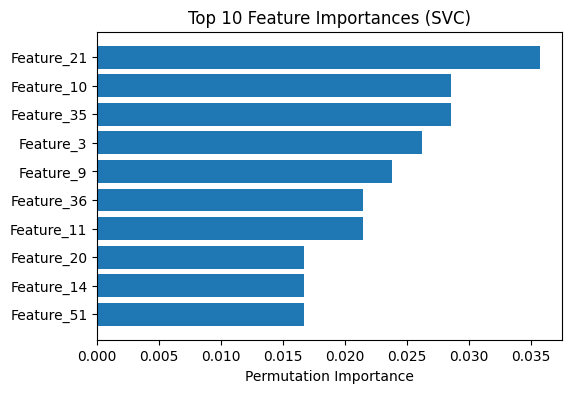

In [3]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svc, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]  # Top 10 features

plt.figure(figsize=(6,4))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [f'Feature_{i}' for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Top 10 Feature Importances (SVC)")
plt.show()

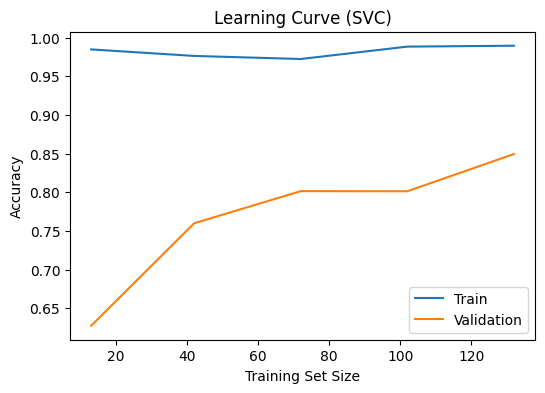

In [4]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    SVC(), X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (SVC)')
plt.legend()
plt.show()

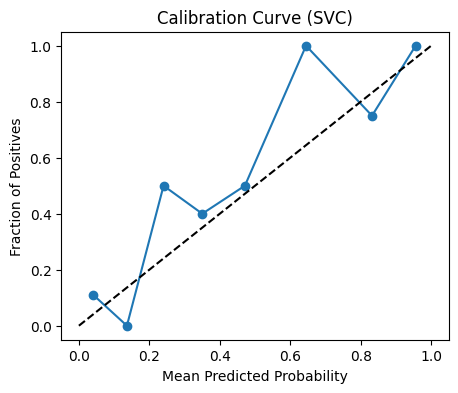

In [5]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_score_svc, n_bins=10)
plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (SVC)')
plt.show()

In [6]:
import pandas as pd

results_df = pd.DataFrame([
    {
        'Model': 'KNN (k=3)', 'Train Acc': metrics_k3['Train Acc'], 'Val Acc': metrics_k3['Val Acc'],
        'Gap': metrics_k3['Gap'], 'Test Acc': metrics_k3['Test Acc'], 'Precision': metrics_k3['Precision'],
        'Recall': metrics_k3['Recall'], 'F1': metrics_k3['F1'], 'Confusion Matrix': str(metrics_k3['Conf Matrix'])
    },
    {
        'Model': 'KNN (k=5)', 'Train Acc': metrics_k5['Train Acc'], 'Val Acc': metrics_k5['Val Acc'],
        'Gap': metrics_k5['Gap'], 'Test Acc': metrics_k5['Test Acc'], 'Precision': metrics_k5['Precision'],
        'Recall': metrics_k5['Recall'], 'F1': metrics_k5['F1'], 'Confusion Matrix': str(metrics_k5['Conf Matrix'])
    },
    {
        'Model': 'SVC (RBF)', 'Train Acc': mean_train_svc, 'Val Acc': mean_val_svc,
        'Gap': gap_svc, 'Test Acc': test_acc_svc, 'Precision': prec_svc,
        'Recall': rec_svc, 'F1': f1_svc, 'Confusion Matrix': str(cm_svc)
    }
])
from IPython.display import display
display(results_df)

,Model,Train Acc,Val Acc,Gap,Test Acc,Precision,Recall,F1,Confusion Matrix
0,KNN (k=3),0.951811,0.849376,0.102435,0.714286,0.722222,0.65,0.684211,[[17 5]\n [ 7 13]]
1,KNN (k=5),0.896093,0.807308,0.088784,0.738095,0.800000,0.60,0.685714,[[19 3]\n [ 8 12]]
2,SVC (RBF),0.990977,0.831373,0.159605,0.857143,0.937500,0.75,0.833333,[[21 1]\n [ 5 15]]
